# Clustering 
## Introduction to DataScience
###### Cristobal Donoso O.
November 14, 2018

<img src="./img/summaryClustering.png" height="742" width="742">

## K-means

![https://mubaris.com/posts/kmeans-clustering/](./img/k4XcapI.gif)

In K-means algorithm we assumed an equal spherical covariance matrix for each cluster, So the most probable cluster for $x_i$ can be obtained by finding the nearest prototype:
<center>$
z^*_i = argmin_k ||x_i - \mu_k||^2_2
$</center>
<br>
where $z_i^*$ is the optimum cluster for the $x_i$ sample which minimize the euclidian distance between $N$ data point and $K$ cluster centers.<br><br>

Several techniques have been proposed to accelerate this algorithm which takes  **O (NKD)** in raw *(Triangle inequality, Elkan 2003)*. <br>
The optimization problem can be addresed as an Expectation Maximization Problem. There are two principal steps:
- Update the cluter centers (E): $\ \mu_k = \frac{1}{N_k}\sum_{i:z_i=k}x_i$
- Update the cluster assignments (M): $\ z^*_i = argmin_k ||x_i - \mu_k||^2_2$

### Example using scikit-learn

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

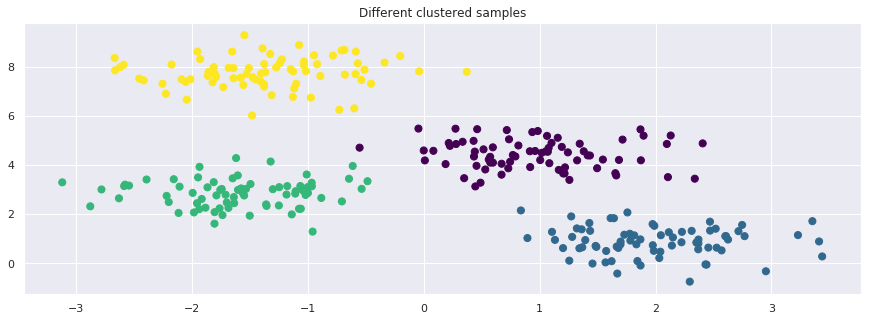

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

plt.figure(figsize=(15,5))
plt.scatter(X[:, 0], X[:, 1], s=50,c=y_true, cmap='viridis')
plt.title('Different clustered samples')
plt.show()

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

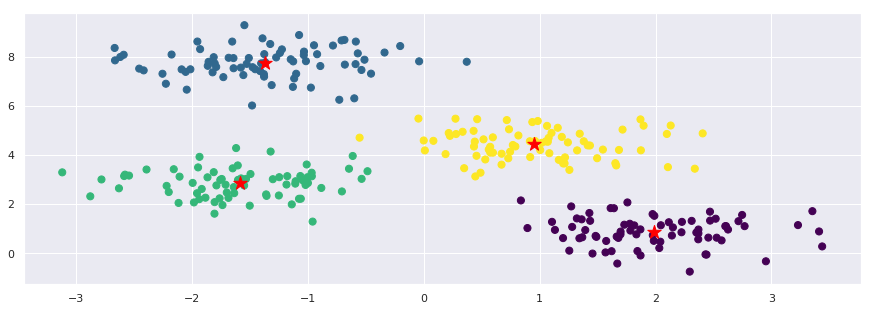

In [5]:
plt.figure(figsize=(15,5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='red', s=200)
plt.show()

### Spectral clustering

In [6]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)

In [7]:
from sklearn.cluster import SpectralClustering
model_espectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels_espectral = model_espectral.fit_predict(X)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0.5,1,'Spectral')

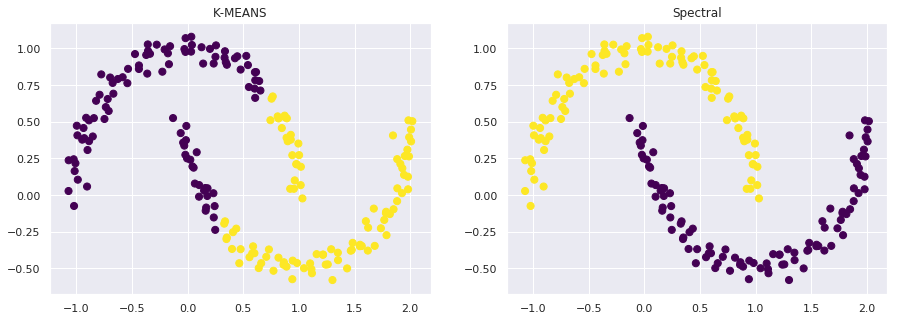

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title('K-MEANS')
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=labels_espectral, s=50, cmap='viridis')
plt.title('Spectral')

### K-means over images

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from PIL import Image
import IPython.display

In [26]:
n_colors = 3
guille_img = Image.open('./img/guille.jpg')

In [27]:
#display(guille_img)

In [28]:
guille_matrix = np.array(guille_img, dtype=np.float64)/255

In [29]:
w,h,d = original_shape = tuple(guille_matrix.shape)

In [30]:
image_array = np.reshape(guille_matrix, (w * h, d))

In [31]:
image_array_sample = shuffle(image_array, random_state=0)[:1000] # 1000 Random data points as Centers
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

In [32]:
labels = kmeans.predict(image_array)

In [33]:
codebook_random = shuffle(image_array, random_state=0)[:n_colors] # Random data points as Centers
# Compute minimum distances between one point and a set of points
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
labels_random

array([2, 0, 0, ..., 2, 2, 2])

In [34]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

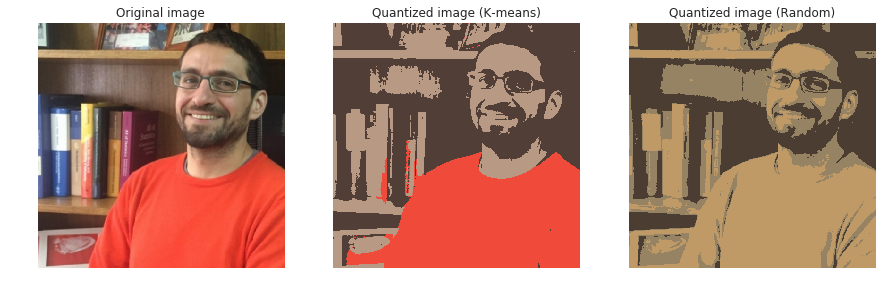

In [35]:
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.axis('off')
plt.title('Original image')
plt.imshow(guille_matrix)
plt.subplot(132)
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.axis('off')
plt.title('Quantized image (K-means)')
plt.subplot(133)
plt.axis('off')
plt.title('Quantized image (Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))

## Hierarchical Clustering

As we said before, there are two approach to make clusters from data. In Hierarchical clustering we allow that the clusters can be nested inside each other. In order to make hierarchical relations between clusters we could do agglomerative clustering (bottom-up) or divisive clustering (top-down)
- In **bottom-up** approach the most similar groups are merged
- In **top-down** groups are split using different criteria

### Agglomerative Clustering

It starts with N groups, where N = Quantity of data (one cluster for each data). Then at each ste it merges the two most similar groups.<br><br>
> The complexity of Agglomerative Clustering is $O(N^3)$. Using a priority queue *(Manning et al. 2008)* we can achieve $O(N^2logN)$.<br>
For large N, a common heuristic is to first run K-means and then apply hierarchical clustering to the estimated cluster centers
<br>
<br>

![aas](./img/hierarch.gif)

[gif source](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)

### Phylogenetic Trees
[example source](https://towardsdatascience.com/molecular-phylogenetics-using-bio-phylo-57ce27492ee9) <br><br>
Phylogenetic trees represent evolutionary relationships between organisms or genes. <br>
In a phylogenetic tree, the species or groups of interest are found at the tips of lines known as branches. The points where branches are divided are called branch points.

Consider you are provided five DNA sequences with their labels in the beginning of each line. 

In [33]:
import pandas as pd

In [34]:
df = pd.read_csv('./db/msa.csv')
df.head()

,type,seq
0,Alpha,AACGTGGCCACAT
1,Beta,AAGGTCGCCACAC
2,Gamma,CAGTTCGCCACAA
3,Delta,GAGATTTCCGCCT
4,Epsilon,GAGATCTCCGCCC


In [35]:
matrix = df.values

In [36]:
dic = {'A': 0, 'C': 1, 'G':2, 'T':3}

In [37]:
new_inputs = []
for seq in matrix[:, 1]:
    new_seq = []
    for amin in seq:
        new_seq.append(dic[amin])
    new_inputs.append(new_seq)

In [38]:
new_inputs

[[0, 0, 1, 2, 3, 2, 2, 1, 1, 0, 1, 0, 3],
 [0, 0, 2, 2, 3, 1, 2, 1, 1, 0, 1, 0, 1],
 [1, 0, 2, 3, 3, 1, 2, 1, 1, 0, 1, 0, 0],
 [2, 0, 2, 0, 3, 3, 3, 1, 1, 2, 1, 1, 3],
 [2, 0, 2, 0, 3, 1, 3, 1, 1, 2, 1, 1, 1]]

In [39]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
clusters = hc.fit_predict(new_inputs)

In [40]:
clusters

array([0, 0, 0, 1, 1])

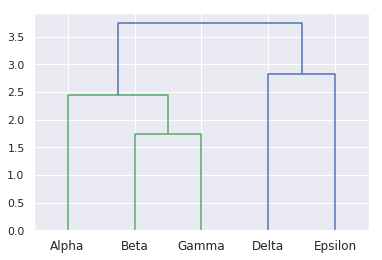

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(new_inputs)
dendrogram(Z, labels=['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon']) 
plt.show()

### DB-Scan

Density-Based Spatial Clustering of Applications with Noise<br>
- Eps ($\epsilon$): Maximum radius of the neighborhood
- Minimun Number of Points(MinPts): Minimum number of points in the Eps-neighborhood of a point
<br><br>

You don't have to specify the number of cluster 
![as](./img/DBSCAN_tutorial.gif)
[gif source](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)

In [37]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [38]:
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

In [39]:
X_scaled = StandardScaler().fit_transform(X)

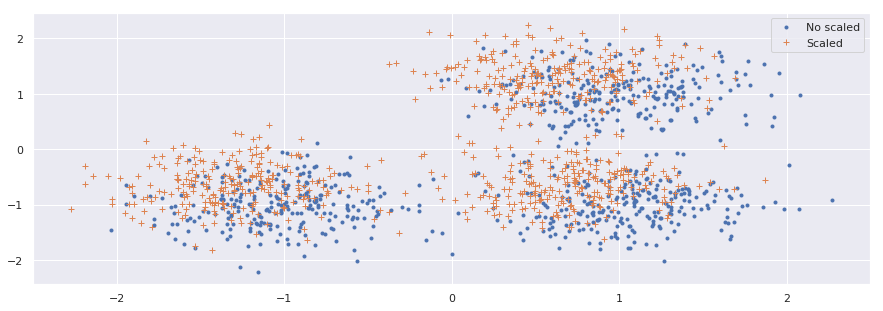

In [40]:
plt.figure(figsize=(15,5))
#plt.subplot(121)
plt.plot(X[:,0], X[:,1], '.', label='No scaled')
plt.plot(X_scaled[:,0], X_scaled[:,1], '+', label='Scaled')
plt.legend()
plt.show()


In [41]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [43]:
np.unique(labels)

array([-1,  0,  1,  2])

In [47]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [49]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_) 
# A clustering result satisfies homogeneity if all of its clusters contain 
# only data points which are members of a single class.
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# A clustering result satisfies completeness if all the data points that 
# are members of a given class are elements of the same cluster
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# v = 2 * (homogeneity * completeness) / (homogeneity + completeness)
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# The Silhouette Coefficient is calculated using the mean intra-cluster 
# distance (a) and the mean nearest-cluster distance (b) for each sample. 
# The Silhouette Coefficient for a sample is (b - a) / max(a, b). 
# To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Homogeneity: 0.947
Completeness: 0.868
V-measure: 0.906
Silhouette Coefficient: 0.621


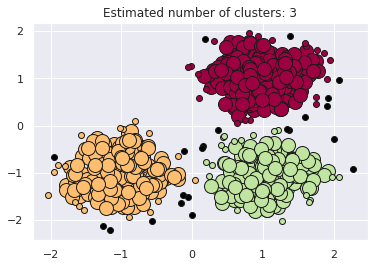

In [50]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# MNIST

In [53]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [54]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

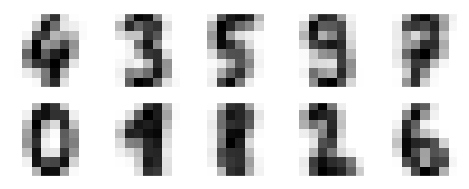

In [55]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [56]:
Z = linkage(digits.data[0:20])
dendrogram(Z) 
plt.show()

NameError: name 'linkage' is not defined

In [65]:
db = DBSCAN(eps=0.2, min_samples=2).fit(digits.data[0:10])
labels = db.labels_

In [66]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])